In [20]:
import jax
import jax.numpy as jnp 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import Transformer
sns.set_style("darkgrid")

In [2]:
transformer = Transformer(input_vocab=50, output_vocab=50, model_dim=4, feedforward_dim=4, num_attention_layer=2)

Try using the transformer with None mask

In [3]:
input_sample = jnp.arange(12).reshape((2,6))
output_sample = jnp.arange(20).reshape((2,10))

params = transformer.init(jax.random.key(0), input_sample, output_sample, None, None)
transformer.apply(params, input_sample, output_sample, None, None)

Array([[[-3.8832495, -3.8901052, -4.5473022, -3.3150616, -4.1841774,
         -3.3173535, -3.5916152, -3.425694 , -3.5433424, -3.6411397,
         -4.419108 , -4.0352864, -3.9471729, -3.644084 , -4.1842794,
         -3.8847198, -3.6716638, -3.988468 , -3.2260635, -4.7781005,
         -3.9860168, -3.419336 , -4.2225084, -3.8155484, -4.05883  ,
         -4.187437 , -3.7259958, -3.926604 , -4.346515 , -4.0264416,
         -3.3493423, -3.5354848, -3.8939052, -4.6259193, -4.0513253,
         -3.8388686, -4.1063695, -3.791463 , -4.8296776, -4.288242 ,
         -4.4788814, -3.427287 , -3.864437 , -4.816655 , -4.5829306,
         -3.7327209, -4.505471 , -4.4341917, -4.4594965, -4.4525957],
        [-3.8197222, -3.8650627, -4.3797336, -3.3109365, -4.1791143,
         -3.291697 , -3.6425798, -3.540963 , -3.5193071, -3.6154962,
         -4.3395376, -4.0163455, -3.8712392, -3.7369072, -4.2373314,
         -4.0140367, -3.6413217, -3.9695039, -3.192668 , -4.771016 ,
         -3.9847758, -3.3524504, 

Try using the transformer with real mask

In [4]:
key = jax.random.key(0)
input_sample = jnp.arange(12).reshape((2,6))
output_sample = jnp.arange(20).reshape((2,10))
input_mask_sample = jax.random.randint(key=key, minval=0, maxval=2, shape=(2,1,6))
output_mask_sample = jax.random.randint(key=key, minval=0, maxval=2, shape=(2, 10, 10))

params = transformer.init(key, input_sample, output_sample, input_mask_sample, output_mask_sample)
transformer.apply(params, input_sample, output_sample, input_mask_sample, output_mask_sample)

Array([[[-3.8681345, -3.8867238, -4.5078106, -3.3131077, -4.1885414,
         -3.3069658, -3.615243 , -3.4587855, -3.5315855, -3.6341102,
         -4.395129 , -4.0283937, -3.9296474, -3.6698895, -4.2085867,
         -3.9100146, -3.6688344, -3.9706228, -3.215465 , -4.785014 ,
         -3.989969 , -3.4028466, -4.2136397, -3.8036103, -4.028261 ,
         -4.169676 , -3.7239065, -3.9255867, -4.342814 , -4.036146 ,
         -3.3552654, -3.5220747, -3.919909 , -4.6540008, -4.0644474,
         -3.853701 , -4.1130333, -3.7568493, -4.843481 , -4.287256 ,
         -4.47244  , -3.4534829, -3.878792 , -4.8165627, -4.579174 ,
         -3.721247 , -4.5071354, -4.434435 , -4.4511824, -4.486019 ],
        [-3.8088722, -3.8686514, -4.3417664, -3.3159966, -4.191152 ,
         -3.2833307, -3.6896515, -3.585733 , -3.5032883, -3.612366 ,
         -4.3043385, -4.0051017, -3.8588016, -3.7690854, -4.277499 ,
         -4.0236945, -3.6519806, -3.9278   , -3.1886106, -4.7833667,
         -3.996279 , -3.3455377, 

## Training and testing transformer 
We'll try to create a transformer which is able to copy tasks perfectly

In [5]:
from transformer_train import create_train_state, train_model, Batch

In [6]:
transformer = Transformer(input_vocab=10, output_vocab=10, model_dim=128, feedforward_dim=512, num_attention_layer=8)

In [7]:
state = create_train_state(model=transformer, learning_rate=1e-3, key=jax.random.key(0))

In [8]:
def copy_data_generator(num_batches=20, batch_size=10, input_size=10):
    for _ in range(num_batches):
        data = np.random.randint(10, size=(batch_size, input_size))
        data = jnp.array(data)
        batch = Batch(data, data, 0)
        yield batch

In [9]:
trained_state, copy_loss, copy_acc = train_model(state, data_generator=copy_data_generator, num_epoch=50)

Epoch: 0, Loss: 2.720553398132324, Accuracy: 0.11222223192453384
Epoch: 1, Loss: 2.2742838859558105, Accuracy: 0.13777777552604675
Epoch: 2, Loss: 2.059727430343628, Accuracy: 0.22833332419395447
Epoch: 3, Loss: 1.9035165309906006, Accuracy: 0.2761111259460449
Epoch: 4, Loss: 1.8307546377182007, Accuracy: 0.29777777194976807
Epoch: 5, Loss: 1.8167788982391357, Accuracy: 0.2994444668292999
Epoch: 6, Loss: 1.765744924545288, Accuracy: 0.319444477558136
Epoch: 7, Loss: 1.750056505203247, Accuracy: 0.33444443345069885
Epoch: 8, Loss: 1.7039794921875, Accuracy: 0.3544444441795349
Epoch: 9, Loss: 1.6993345022201538, Accuracy: 0.366666704416275
Epoch: 10, Loss: 1.620556116104126, Accuracy: 0.3938888907432556
Epoch: 11, Loss: 1.4534995555877686, Accuracy: 0.45777779817581177
Epoch: 12, Loss: 1.376550316810608, Accuracy: 0.5044444799423218
Epoch: 13, Loss: 1.250815987586975, Accuracy: 0.5388889312744141
Epoch: 14, Loss: 1.1735477447509766, Accuracy: 0.5788889527320862
Epoch: 15, Loss: 1.1151517

In [23]:
copy_loss = list(map(lambda x: x.item(), copy_loss))
copy_acc = list(map(lambda x: x.item(), copy_acc))

Text(0.5, 1.0, 'Loss vs Epoch Number (Copy task)')

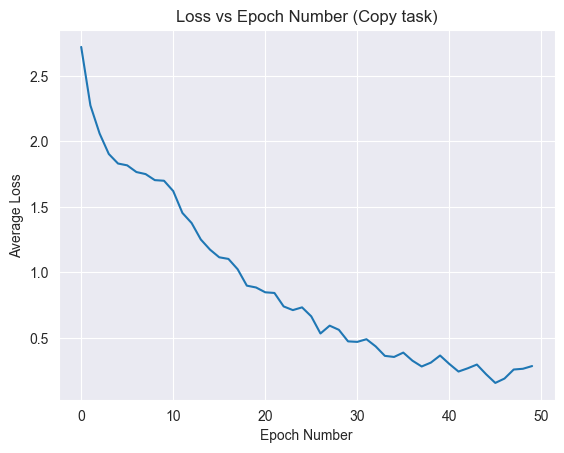

In [24]:
sns.lineplot(copy_loss)
plt.xlabel("Epoch Number")
plt.ylabel("Average Loss")
plt.title("Loss vs Epoch Number (Copy task)")

Text(0.5, 1.0, 'Accuracy vs Epoch Number (Copy task)')

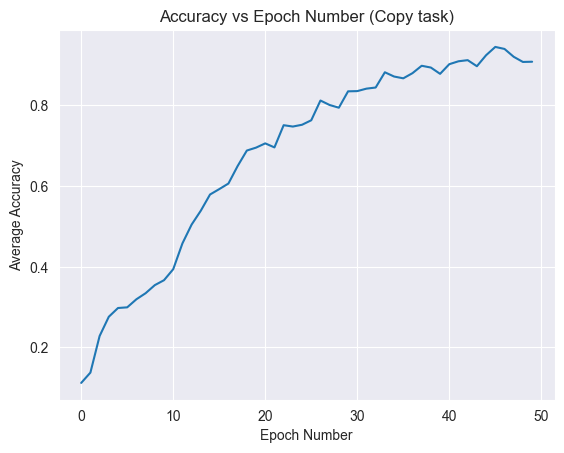

In [26]:
sns.lineplot(copy_acc)
plt.xlabel("Epoch Number")
plt.ylabel("Average Accuracy")
plt.title("Accuracy vs Epoch Number (Copy task)")

In [10]:
params = trained_state.params 

We'll now try to run this transformer

In [11]:
from transformer_train import decode

input = jax.random.randint(key=jax.random.key(0), shape=(30,10), minval=0, maxval=9)
output_init = input[:, 0].reshape(-1, 1)
input_mask = jnp.ones((1,1,10), dtype=int)

In [12]:
pred = decode(trained_state, input, output_init, 10, input_mask)

In [13]:
(input == pred).mean()

Array(0.77000004, dtype=float32)

### Sequence Reversal

We will try to train a transformer to reverse sequences

In [27]:
def reverse_data_generator(num_batches=20, batch_size=10, input_size=10):
    for _ in range(num_batches):
        data = np.random.randint(10, size=(batch_size, input_size))
        data = jnp.array(data)
        reverse_data = jnp.flip(data, axis=1)
        batch = Batch(data, reverse_data, 0)
        yield batch

In [28]:
reverse_transformer = Transformer(input_vocab=10, output_vocab=10, model_dim=128, feedforward_dim=512, num_attention_layer=8)

In [29]:
reverse_state = create_train_state(model=reverse_transformer, learning_rate=1e-3, key=jax.random.key(0))

In [30]:
reverse_trained_state, reverse_loss, reverse_acc = train_model(reverse_state, data_generator=reverse_data_generator, num_epoch=50)

Epoch: 0, Loss: 2.90618634223938, Accuracy: 0.11722223460674286
Epoch: 1, Loss: 2.304731607437134, Accuracy: 0.12999998033046722
Epoch: 2, Loss: 2.2068676948547363, Accuracy: 0.17777776718139648
Epoch: 3, Loss: 2.0252537727355957, Accuracy: 0.23277778923511505
Epoch: 4, Loss: 1.915050745010376, Accuracy: 0.26777777075767517
Epoch: 5, Loss: 1.8062890768051147, Accuracy: 0.3077777922153473
Epoch: 6, Loss: 1.7834562063217163, Accuracy: 0.3099999725818634
Epoch: 7, Loss: 1.7704222202301025, Accuracy: 0.319444477558136
Epoch: 8, Loss: 1.7436609268188477, Accuracy: 0.32777780294418335
Epoch: 9, Loss: 1.6745643615722656, Accuracy: 0.3705555200576782
Epoch: 10, Loss: 1.642918586730957, Accuracy: 0.37222224473953247
Epoch: 11, Loss: 1.5174319744110107, Accuracy: 0.4322222173213959
Epoch: 12, Loss: 1.4256917238235474, Accuracy: 0.4816667139530182
Epoch: 13, Loss: 1.3141752481460571, Accuracy: 0.5211111307144165
Epoch: 14, Loss: 1.2545028924942017, Accuracy: 0.5355555415153503
Epoch: 15, Loss: 1.

In [31]:
reverse_loss = list(map(lambda x: x.item(), reverse_loss))
reverse_acc = list(map(lambda x: x.item(), reverse_acc))

Text(0.5, 1.0, 'Loss vs Epoch Number (Sequence reversal task)')

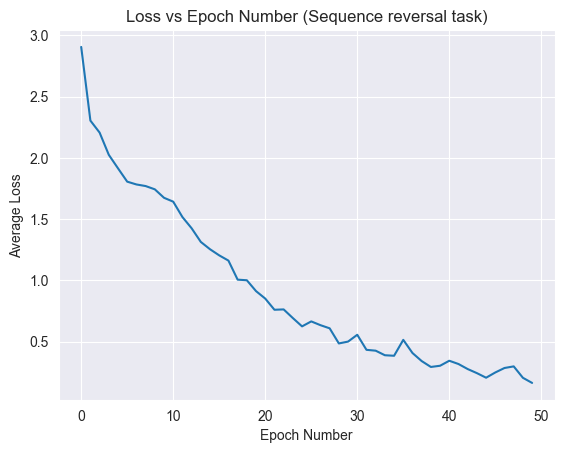

In [32]:
sns.lineplot(reverse_loss)
plt.xlabel("Epoch Number")
plt.ylabel("Average Loss")
plt.title("Loss vs Epoch Number (Sequence reversal task)")

Text(0.5, 1.0, 'Accuracy vs Epoch Number (Sequence reversal task)')

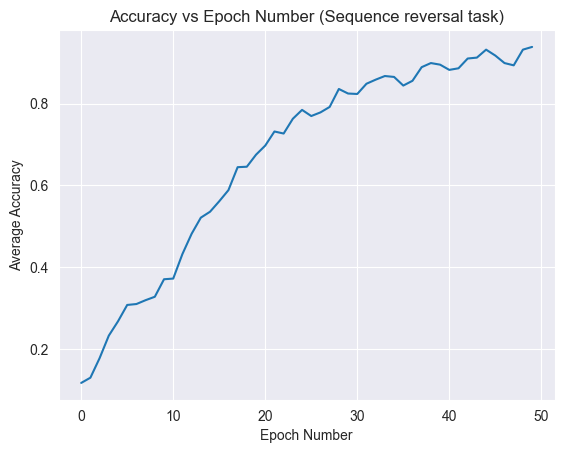

In [33]:
sns.lineplot(reverse_acc)
plt.xlabel("Epoch Number")
plt.ylabel("Average Accuracy")
plt.title("Accuracy vs Epoch Number (Sequence reversal task)")

In [34]:
from transformer_train import decode

input = jax.random.randint(key=jax.random.key(0), shape=(30,10), minval=0, maxval=9)
output_init = input[:, 0].reshape(-1, 1)
input_mask = jnp.ones((1,1,10), dtype=int)

In [35]:
pred = decode(reverse_trained_state, input, output_init, 10, input_mask)

In [36]:
(pred == jnp.flip(input, axis=1)).mean()

Array(0.71333337, dtype=float32)

## Sorting Numbers
We will try to train a transformer to sort numbers.

In [37]:
def sort_data_generator(num_batches=20, batch_size=10, input_size=10):
    for _ in range(num_batches):
        data = np.random.randint(10, size=(batch_size, input_size))
        data = jnp.array(data)
        sorted_data = jnp.sort(data, axis=1)
        batch = Batch(data, sorted_data, 0)
        yield batch

In [38]:
sort_transformer = Transformer(input_vocab=10, output_vocab=10, model_dim=128, feedforward_dim=512, num_attention_layer=8)

In [39]:
sort_state = create_train_state(model=sort_transformer, learning_rate=1e-3, key=jax.random.key(0))

In [40]:
sort_trained_state, sort_loss, sort_acc = train_model(sort_state, data_generator=sort_data_generator, num_epoch=50)

Epoch: 0, Loss: 2.202963352203369, Accuracy: 0.32777777314186096
Epoch: 1, Loss: 0.97857266664505, Accuracy: 0.5894445180892944
Epoch: 2, Loss: 0.6631667017936707, Accuracy: 0.7072221636772156
Epoch: 3, Loss: 0.6256232857704163, Accuracy: 0.7366666793823242
Epoch: 4, Loss: 0.5488115549087524, Accuracy: 0.7655555009841919
Epoch: 5, Loss: 0.49644628167152405, Accuracy: 0.7738889455795288
Epoch: 6, Loss: 0.49080878496170044, Accuracy: 0.7794444561004639
Epoch: 7, Loss: 0.3899126648902893, Accuracy: 0.8316665887832642
Epoch: 8, Loss: 0.3871919512748718, Accuracy: 0.8244444727897644
Epoch: 9, Loss: 0.3370092213153839, Accuracy: 0.8588888049125671
Epoch: 10, Loss: 0.38622021675109863, Accuracy: 0.8211110830307007
Epoch: 11, Loss: 0.36277541518211365, Accuracy: 0.8433332443237305
Epoch: 12, Loss: 0.35178297758102417, Accuracy: 0.855555534362793
Epoch: 13, Loss: 0.3353940546512604, Accuracy: 0.8677778244018555
Epoch: 14, Loss: 0.2837854325771332, Accuracy: 0.888888955116272
Epoch: 15, Loss: 0.

In [41]:
from transformer_train import decode

input = jax.random.randint(key=jax.random.key(0), shape=(30,10), minval=0, maxval=9)
output_init = input[:, 0].reshape(-1, 1)
input_mask = jnp.ones((1,1,10), dtype=int)

In [42]:
pred = decode(sort_trained_state, input, output_init, 10, input_mask)

In [43]:
(pred == jnp.sort(input, axis=1)).mean()

Array(0.54333335, dtype=float32)

In [ ]:
sort_state.apply_fn()